<a href="https://colab.research.google.com/github/PrastioRifkiWijaya/SENTIMEN-ANALISIS-RANDOM-FOREST-PEMINDAHAN-IBUKOTA-NEGARA-INDONESIA-/blob/main/PBA_TUGAS_AKHIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projek Akhir PBA**

**1. IMPORT LIBRARY DAN IMPORT DATAASET**

---



In [ ]:
# Install pandas
!pip install pandas

# Install numpy
!pip install numpy

# Install sklearn
!pip install sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from sklearn import preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:
headers= ['created_at']
df = pd.read_csv( '/content/drive/MyDrive/SEMESTER 5/PBA/ibukotabaru.csv',error_bad_lines=False, names=headers)
df

<ipython-input-3-4042043767db>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv( '/content/drive/MyDrive/SEMESTER 5/PBA/ibukotabaru.csv',error_bad_lines=False, names=headers)
Skipping line 2: expected 1 fields, saw 3
Skipping line 5: expected 1 fields, saw 2
Skipping line 6: expected 1 fields, saw 2
Skipping line 7: expected 1 fields, saw 2
Skipping line 8: expected 1 fields, saw 2
Skipping line 10: expected 1 fields, saw 2
Skipping line 11: expected 1 fields, saw 2
Skipping line 12: expected 1 fields, saw 4
Skipping line 14: expected 1 fields, saw 2
Skipping line 15: expected 1 fields, saw 2
Skipping line 16: expected 1 fields, saw 4
Skipping line 17: expected 1 fields, saw 3
Skipping line 20: expected 1 fields, saw 2
Skipping line 21: expected 1 fields, saw 2
Skipping line 23: expected 1 fields, saw 3
Skipping line 24: expected 1 fields, saw 2
Skipping line 27: expected 1 f

created_at
0   created_at;id_str;full_text;quote_count;reply_...
1   Wed Nov 22 13:52:11 +0000 2023;172732409633644...
2   Wed Nov 22 12:43:40 +0000 2023;172730685484450...
3   Sat Oct 28 14:50:20 +0000 2023;171827903364411...
4   Sun Sep 24 00:02:41 +0000 2023;170573446290517...
5   Tue Sep 19 02:06:17 +0000 2023;170395362638390...
6   Sat Sep 16 09:47:39 +0000 2023;170298256927979...
7   Sat Sep 09 09:42:07 +0000 2023;170044446151455...
8   Sun Aug 27 09:35:25 +0000 2023;169573173474113...
9   Fri Aug 25 00:24:18 +0000 2023;169486826751988...
10  Sun Aug 20 08:50:10 +0000 2023;169318363462543...
11  Sun Aug 13 00:57:06 +0000 2023;169052786693570...
12  Thu Aug 03 14:11:17 +0000 2023;168710385172653...
13  Mon Jul 31 22:55:55 +0000 2023;168614871591100...
14  Fri Jul 14 08:06:36 +0000 2023;167976431611401...
15  Fri Jul 14 05:25:37 +0000 2023;167972380675840...
16  Fri Jul 14 03:34:53 +0000 2023;167969593702183...
17  Sun Jun 25 23:53:06 +0000 2023;167311714246684...
18  Thu Jun 22 02:47:26 +0000 2023;167171146258543...
19  Fri Jun 09 23:21:12 +0000 2023;166731090807347...
20  Thu May 18 06:31:36 +0000 2023;165908430168462...
21  Sat May 13 05:33:03 +0000 2023;165725762774172...
22  Tue Apr 04 04:34:16 +0000 2023;164310970575634...
23  Sun Apr 02 05:14:40 +0000 2023;164239509750458...
24  Sat Apr 01 01:44:59 +0000 2023;164197994254738...
25  Fri Mar 31 03:22:39 +0000 2023;164164213394493...
26  Fri Mar 31 03:22:31 +0000 2023;164164210195078...
27  Fri Mar 31 03:22:23 +0000 2023;164164206796435...
28  Fri Mar 31 03:22:16 +0000 2023;164164203583177...
29  Tue Mar 28 10:56:27 +0000 2023;164066917302102...
30  Fri Mar 17 10:25:35 +0000 2023;163667513693295...
31  Thu Mar 02 05:03:45 +0000 2023;163115832799988...
32  Thu Mar 02 03:57:25 +0000 2023;163114163544589...
33  Wed Mar 01 04:12:31 +0000 2023;163078304487246...
34  Sun Feb 26 08:07:01 +0000 2023;162975489885749...
35  Sat Feb 25 04:07:34 +0000 2023;162933225151018...
36  Tue Feb 14 07:23:59 +0000 2023;162539541429079...
37  Mon Feb 13 02:21:11 +0000 2023;162495682438565...

In [ ]:
import pandas as pd

data = pd.read_csv ("/content/drive/MyDrive/SEMESTER 5/PBA/ibukotabaru.csv", sep=';')
print(data.head())

                       created_at               id_str  \
0  Wed Nov 22 15:48:42 +0000 2023  1727353420347318294   
1  Wed Nov 22 13:52:11 +0000 2023  1727324096336441662   
2  Wed Nov 22 12:43:40 +0000 2023  1727306854844502471   
3  Wed Nov 22 07:06:41 +0000 2023  1727222051629588481   
4  Mon Nov 20 11:06:24 +0000 2023  1726557600400171171   

                                           full_text  quote_count  \
0  ...tentang wacana pemindahan ibukota Indonesia...            0   
1  @Yurissa_Samosir @AdeDhani9 @aking_adit @chaid...            0   
2  @kumparan Pak..... biaya dinas dari indonesia ...            0   
3  @yogieprtmdj @kumparan Pemindahan ibukota baru...            0   
4  @tanyakanrl Aneh ah yg maksain jkt tetep ibuko...            0   

   reply_count  retweet_count  favorite_count lang          user_id_str  \
0            1              0               0   in           2556873745   
1            0              0               0   in  1426317122364338180   
2          

Menampilkan informasi data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           103 non-null    object
 1   id_str               103 non-null    int64 
 2   full_text            103 non-null    object
 3   quote_count          103 non-null    int64 
 4   reply_count          103 non-null    int64 
 5   retweet_count        103 non-null    int64 
 6   favorite_count       103 non-null    int64 
 7   lang                 103 non-null    object
 8   user_id_str          103 non-null    int64 
 9   conversation_id_str  103 non-null    int64 
 10  username             103 non-null    object
 11  tweet_url            103 non-null    object
dtypes: int64(7), object(5)
memory usage: 9.8+ KB


Statistik Dataset

In [ ]:
summary = data.describe ()
summary.head ()

id_str  quote_count  reply_count  retweet_count  favorite_count  \
count  1.030000e+02   103.000000   103.000000     103.000000      103.000000   
mean   1.668317e+18     0.087379     1.126214       1.281553        7.233010   
std    3.246150e+16     0.346036     2.816894       4.282700       25.101833   
min    1.620264e+18     0.000000     0.000000       0.000000        0.000000   
25%    1.632651e+18     0.000000     0.000000       0.000000        0.000000   

        user_id_str  conversation_id_str  
count  1.030000e+02         1.030000e+02  
mean   9.021487e+17         1.666155e+18  
std    7.037697e+17         3.446502e+16  
min    6.465718e+07         1.557323e+18  
25%    2.446493e+09         1.630978e+18

Visualisasi original data wordcloud dan frekuensi kata

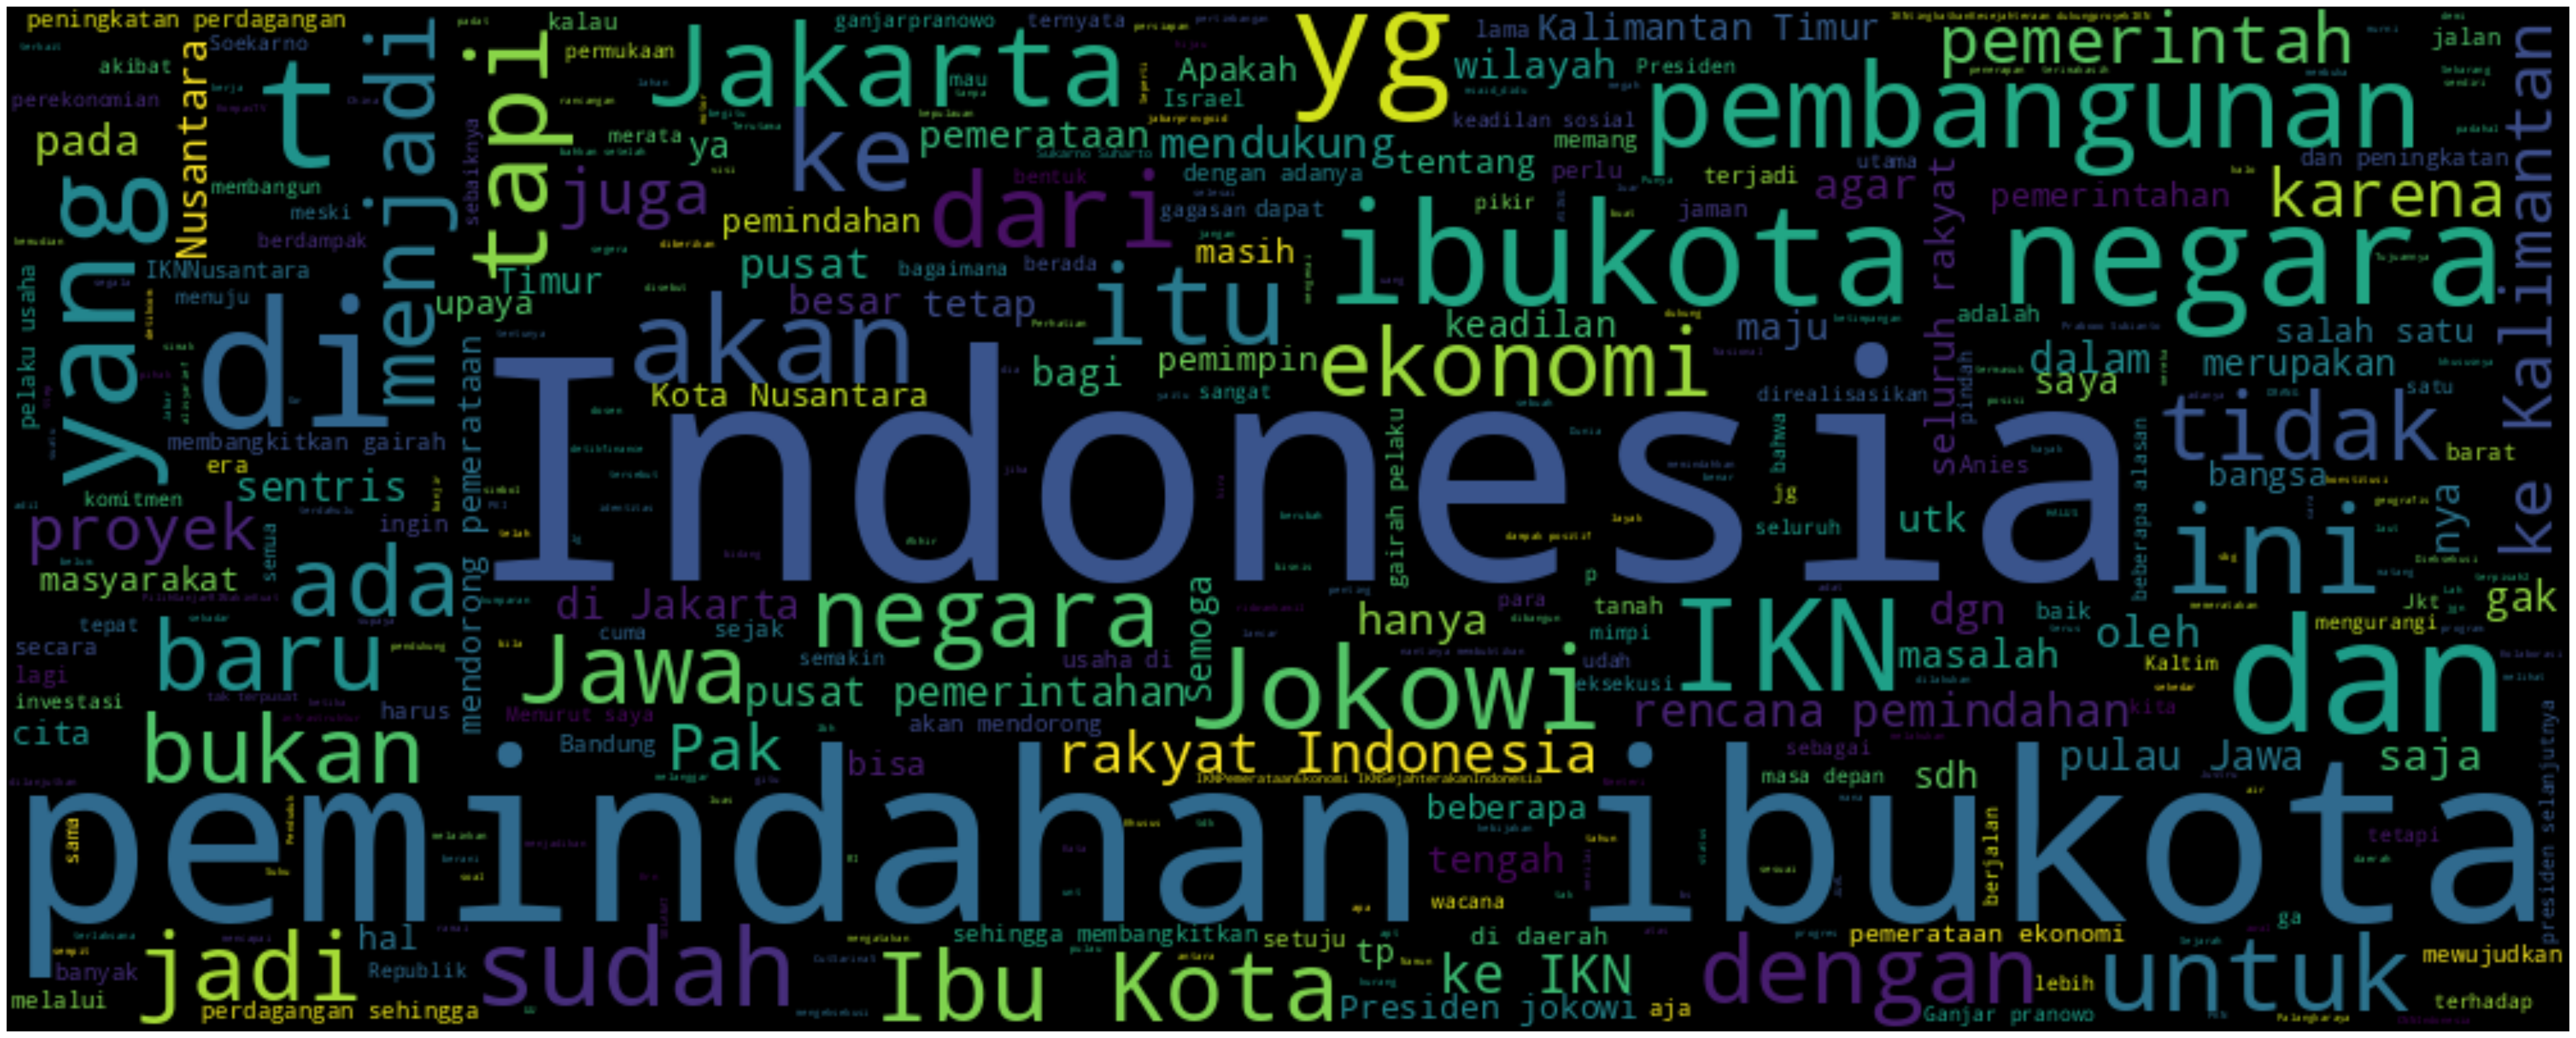

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df = " ".join(data['full_text'].tolist())

# Add custom stopwords
stopwords = set (STOPWORDS)
stopwords.update(['https', 'co', 'RT', 'amp', '...'])

# Create WordCloud
wc = WordCloud(stopwords=stopwords, background_color='black', max_words=1000, width=1000, height=400)
wc.generate(df)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(50, 100))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


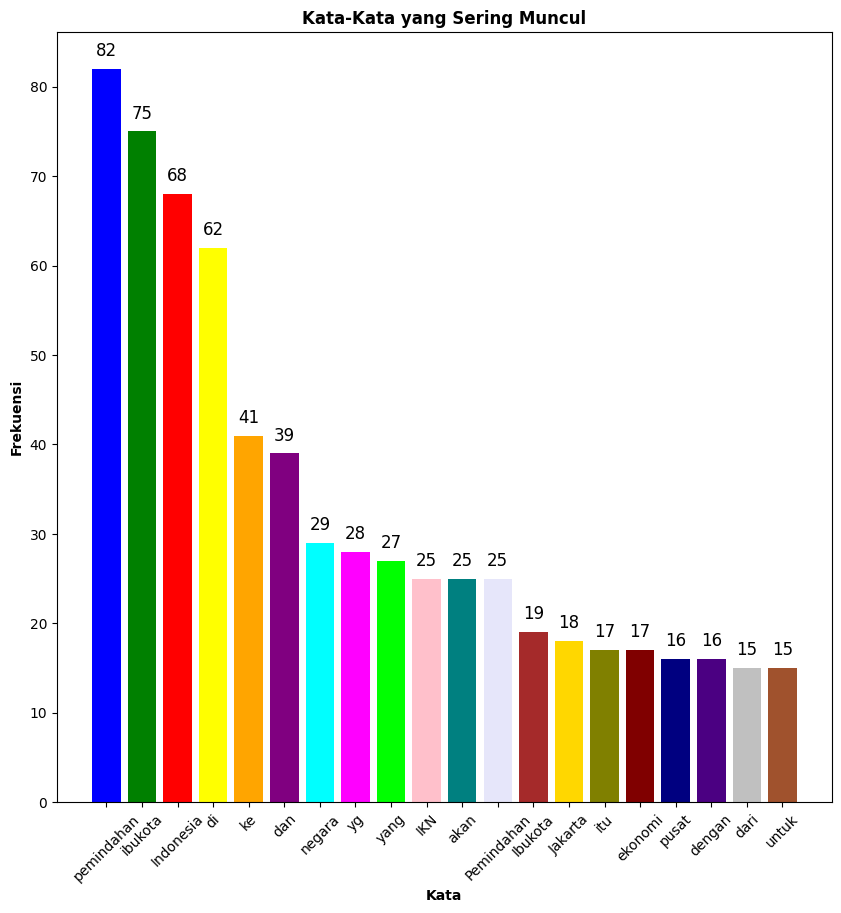

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text =" ".join(data["full_text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(20)
word, count = zip(*top_words)

colors = plt.cm.Paired(range(len(word)))
colors = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'cyan',
          'magenta', 'lime', 'pink', 'teal', 'lavender', 'brown', 'gold',
          'olive', 'maroon', 'navy', 'indigo', 'silver', 'sienna']


plt.figure(figsize=(10, 10))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata", fontweight='bold')
plt.ylabel("Frekuensi", fontweight='bold')
plt.title("Kata-Kata yang Sering Muncul", fontweight='bold')
plt.xticks(rotation = 45)

#for bar, num in zip(bars, count):
#    plt.text (bar.get_x() + bar.get_width() / 2 - 0.5, num + 1, str(num), fontsize=12, color='black', ha='left')
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 1, str(num), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

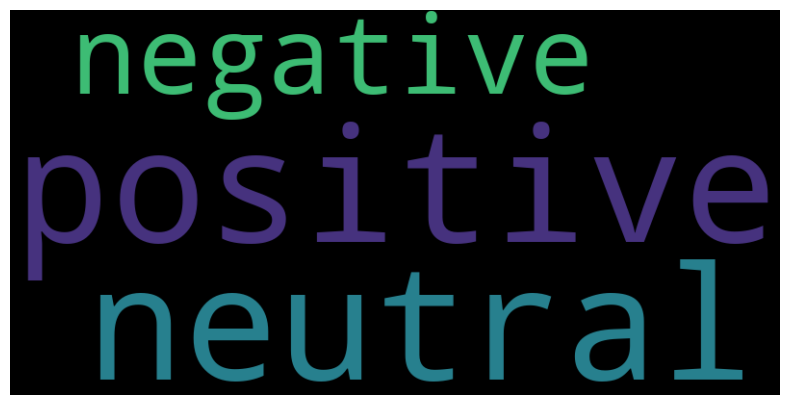

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Contoh DataFrame (gantilah dengan data sesuai kebutuhan)
data = {
    'full_text': ['positive', 'negative', 'neutral', 'positive', 'neutral'],
    # tambahkan kolom data lainnya sesuai kebutuhan
}

# Ubah DataFrame ke format yang sesuai jika belum
df = pd.DataFrame(data)

# Gabungkan teks dari kolom 'full_text' menjadi satu teks
text = " ".join(full_text for full_text in df['full_text'])

# Tambahkan custom stopwords
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', 'amp', '...'])

# Buat WordCloud
wc = WordCloud(stopwords=stopwords, background_color='black', max_words=1000, width=800, height=400)
wc.generate(text)

# Tampilkan WordCloud menggunakan Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


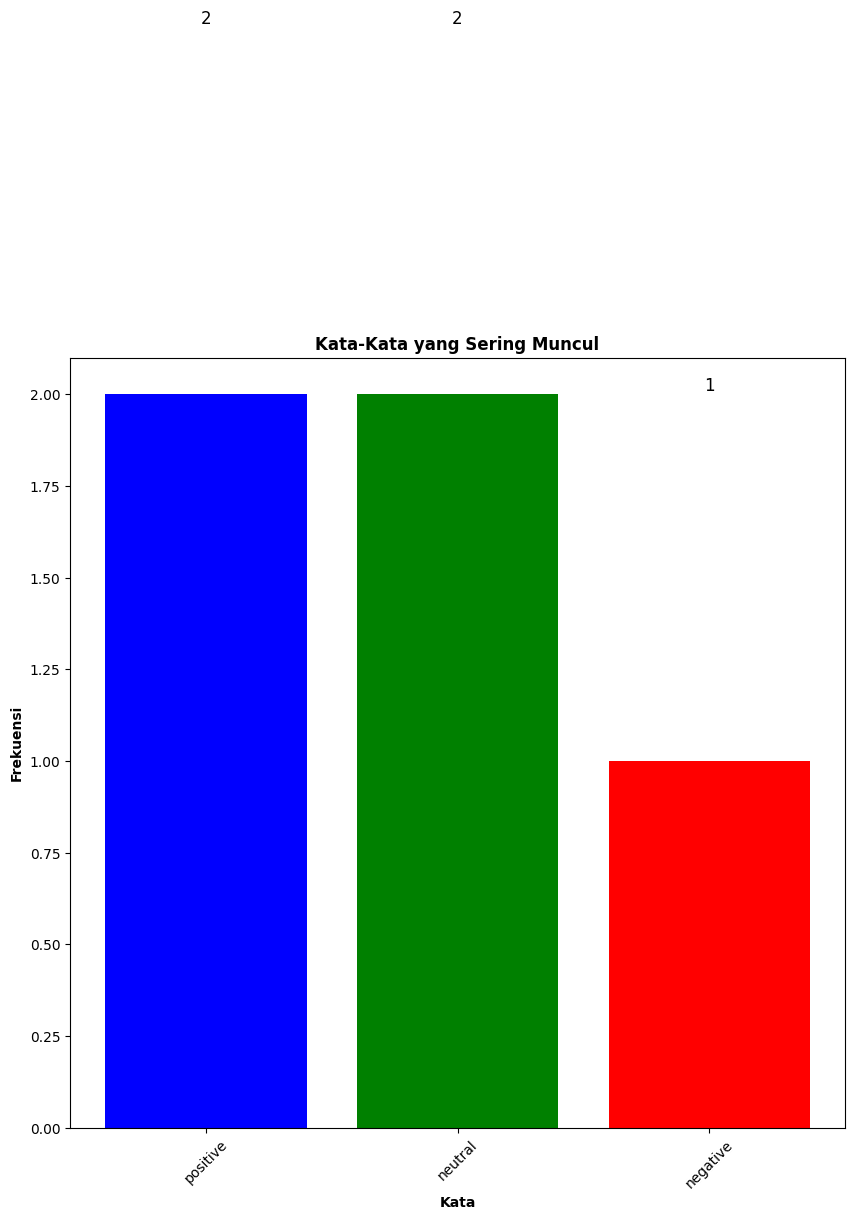

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text =" ".join(data["full_text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(20)
word, count = zip(*top_words)

colors = plt.cm.Paired(range(len(word)))
colors = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'cyan',
          'magenta', 'lime', 'pink', 'teal', 'lavender', 'brown', 'gold',
          'olive', 'maroon', 'navy', 'indigo', 'silver', 'sienna']


plt.figure(figsize=(10, 10))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata", fontweight='bold')
plt.ylabel("Frekuensi", fontweight='bold')
plt.title("Kata-Kata yang Sering Muncul", fontweight='bold')
plt.xticks(rotation = 45)

#for bar, num in zip(bars, count):
#    plt.text (bar.get_x() + bar.get_width() / 2 - 0.5, num + 1, str(num), fontsize=12, color='black', ha='left')
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 1, str(num), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# **PRE-PROCESSING DATA**

Silahkan masukan dataset ke dalam dataframe. Data Frame berfungsi untuk menyimpan dan mencoba data dalam bentuk tabel yang terorganisir

In [ ]:
df = pd.DataFrame (data[['full_text']])
df.head(105)

full_text
0    ...tentang wacana pemindahan ibukota Indonesia...
1    @Yurissa_Samosir @AdeDhani9 @aking_adit @chaid...
2    @kumparan Pak..... biaya dinas dari indonesia ...
3    @yogieprtmdj @kumparan Pemindahan ibukota baru...
4    @tanyakanrl Aneh ah yg maksain jkt tetep ibuko...
..                                                 ...
98   Yup, bisa disebut pemindahan ibukota ini sebag...
99   Indonesia Mendorong Pemerataan Pembangunan Mel...
100  Peresmian Tahun 2024 Jakarta Bukan Lagi Ibu Ko...
101  Pemindahan Ibukota Bisa Wujudkan Pemerataan da...
102  Pembeli apt disuruh bayar bertahun2 tp apt-nya...

[103 rows x 1 columns]

**Cleaning Dataset**

---



In [ ]:
import re
import string
import pandas as pd

def remove_URL(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet):
    url = re.compile(r'<.*?>')
    return url.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # simbol & dingbat
        u"\U0001F680-\U0001F6FF"  # transportasi & simbol map
        u"\U0001F1E0-\U0001F1FF"  # flag negara
                            "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', tweet)

def remove_angka(tweet):
    tweet = re.sub('[0-9]+', '', tweet)
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    return tweet

def remove_punct(tweets):
    translator = str.maketrans('', '', string.punctuation)
    return tweets.translate(translator)

# Misalkan df adalah DataFrame Anda
df['cleasing'] = df['full_text'].apply(lambda x: remove_URL(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_html(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_emoji(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_punct(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_angka(x))

df.head(105)


full_text  \
0    ...tentang wacana pemindahan ibukota Indonesia...   
1    @Yurissa_Samosir @AdeDhani9 @aking_adit @chaid...   
2    @kumparan Pak..... biaya dinas dari indonesia ...   
3    @yogieprtmdj @kumparan Pemindahan ibukota baru...   
4    @tanyakanrl Aneh ah yg maksain jkt tetep ibuko...   
..                                                 ...   
98   Yup, bisa disebut pemindahan ibukota ini sebag...   
99   Indonesia Mendorong Pemerataan Pembangunan Mel...   
100  Peresmian Tahun 2024 Jakarta Bukan Lagi Ibu Ko...   
101  Pemindahan Ibukota Bisa Wujudkan Pemerataan da...   
102  Pembeli apt disuruh bayar bertahun2 tp apt-nya...   

                                              cleasing  
0    tentang wacana pemindahan ibukota Indonesia yg...  
1    YurissaSamosir AdeDhani akingadit chaidar Kang...  
2    kumparan Pak biaya dinas dari indonesia timur ...  
3    yogieprtmdj kumparan Pemindahan ibukota baru i...  
4    tanyakanrl Aneh ah yg maksain jkt tetep ibukot...  
..                                                 ...  
98   Yup bisa disebut pemindahan ibukota ini sebaga...  
99   Indonesia Mendorong Pemerataan Pembangunan Mel...  
100  Peresmian Tahun  Jakarta Bukan Lagi Ibu Kota N...  
101  Pemindahan Ibukota Bisa Wujudkan Pemerataan da...  
102  Pembeli apt disuruh bayar bertahun tp aptnya g...  

[103 rows x 2 columns]

**Case Folding dan Tokenization**

---
Case Folding adalah proses mengubah huruf-huruf dalam sebuah teks menjadi format yang seragam, biasanya semua huruf diubah menjadi huruf kecil atau huruf besar. Ini membantu dalam perbandingan dan pencocokan teks tanpa memperhatikan perbedaan huruf besar atau kecil.

Misalnya, 'Halo' akan diubah menjadi 'halo'. Ini memungkinkan perbandingan string yang lebih efisien karena tidak perlu mempertimbangkan perbedaan kapitalisasi. Proses ini berguna dalam pengindeksan teks, pengujian kesamaan string, dan dalam kasus di mana perbedaan kapitalisasi tidak penting dalam analisis atau pengecekan.


In [ ]:
# Misalkan df adalah DataFrame Anda
df['Tokenization and Case Folding'] = df['cleasing'].apply(lambda x: x.lower().split())
df.head(105)


full_text  \
0    ...tentang wacana pemindahan ibukota Indonesia...   
1    @Yurissa_Samosir @AdeDhani9 @aking_adit @chaid...   
2    @kumparan Pak..... biaya dinas dari indonesia ...   
3    @yogieprtmdj @kumparan Pemindahan ibukota baru...   
4    @tanyakanrl Aneh ah yg maksain jkt tetep ibuko...   
..                                                 ...   
98   Yup, bisa disebut pemindahan ibukota ini sebag...   
99   Indonesia Mendorong Pemerataan Pembangunan Mel...   
100  Peresmian Tahun 2024 Jakarta Bukan Lagi Ibu Ko...   
101  Pemindahan Ibukota Bisa Wujudkan Pemerataan da...   
102  Pembeli apt disuruh bayar bertahun2 tp apt-nya...   

                                              cleasing  \
0    tentang wacana pemindahan ibukota Indonesia yg...   
1    YurissaSamosir AdeDhani akingadit chaidar Kang...   
2    kumparan Pak biaya dinas dari indonesia timur ...   
3    yogieprtmdj kumparan Pemindahan ibukota baru i...   
4    tanyakanrl Aneh ah yg maksain jkt tetep ibukot...   
..                                                 ...   
98   Yup bisa disebut pemindahan ibukota ini sebaga...   
99   Indonesia Mendorong Pemerataan Pembangunan Mel...   
100  Peresmian Tahun  Jakarta Bukan Lagi Ibu Kota N...   
101  Pemindahan Ibukota Bisa Wujudkan Pemerataan da...   
102  Pembeli apt disuruh bayar bertahun tp aptnya g...   

                         Tokenization and Case Folding  
0    [tentang, wacana, pemindahan, ibukota, indones...  
1    [yurissasamosir, adedhani, akingadit, chaidar,...  
2    [kumparan, pak, biaya, dinas, dari, indonesia,...  
3    [yogieprtmdj, kumparan, pemindahan, ibukota, b...  
4    [tanyakanrl, aneh, ah, yg, maksain, jkt, tetep...  
..                                                 ...  
98   [yup, bisa, disebut, pemindahan, ibukota, ini,...  
99   [indonesia, mendorong, pemerataan, pembangunan...  
100  [peresmian, tahun, jakarta, bukan, lagi, ibu, ...  
101  [pemindahan, ibukota, bisa, wujudkan, pemerata...  
102  [pembeli, apt, disuruh, bayar, bertahun, tp, a...  

[103 rows x 3 columns]

**Filtering atau Stopword Removal**

---



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Mengambil stopwords bahasa Indonesia dari NLTK
stop_words = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Misalkan df adalah DataFrame Anda
df['Filtering/stopword removal'] = df['Tokenization and Case Folding'].apply(lambda x: remove_stopwords(x))
df.head(105)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


full_text  \
0    ...tentang wacana pemindahan ibukota Indonesia...   
1    @Yurissa_Samosir @AdeDhani9 @aking_adit @chaid...   
2    @kumparan Pak..... biaya dinas dari indonesia ...   
3    @yogieprtmdj @kumparan Pemindahan ibukota baru...   
4    @tanyakanrl Aneh ah yg maksain jkt tetep ibuko...   
..                                                 ...   
98   Yup, bisa disebut pemindahan ibukota ini sebag...   
99   Indonesia Mendorong Pemerataan Pembangunan Mel...   
100  Peresmian Tahun 2024 Jakarta Bukan Lagi Ibu Ko...   
101  Pemindahan Ibukota Bisa Wujudkan Pemerataan da...   
102  Pembeli apt disuruh bayar bertahun2 tp apt-nya...   

                                              cleasing  \
0    tentang wacana pemindahan ibukota Indonesia yg...   
1    YurissaSamosir AdeDhani akingadit chaidar Kang...   
2    kumparan Pak biaya dinas dari indonesia timur ...   
3    yogieprtmdj kumparan Pemindahan ibukota baru i...   
4    tanyakanrl Aneh ah yg maksain jkt tetep ibukot...   
..                                                 ...   
98   Yup bisa disebut pemindahan ibukota ini sebaga...   
99   Indonesia Mendorong Pemerataan Pembangunan Mel...   
100  Peresmian Tahun  Jakarta Bukan Lagi Ibu Kota N...   
101  Pemindahan Ibukota Bisa Wujudkan Pemerataan da...   
102  Pembeli apt disuruh bayar bertahun tp aptnya g...   

                         Tokenization and Case Folding  \
0    [tentang, wacana, pemindahan, ibukota, indones...   
1    [yurissasamosir, adedhani, akingadit, chaidar,...   
2    [kumparan, pak, biaya, dinas, dari, indonesia,...   
3    [yogieprtmdj, kumparan, pemindahan, ibukota, b...   
4    [tanyakanrl, aneh, ah, yg, maksain, jkt, tetep...   
..                                                 ...   
98   [yup, bisa, disebut, pemindahan, ibukota, ini,...   
99   [indonesia, mendorong, pemerataan, pembangunan...   
100  [peresmian, tahun, jakarta, bukan, lagi, ibu, ...   
101  [pemindahan, ibukota, bisa, wujudkan, pemerata...   
102  [pembeli, apt, disuruh, bayar, bertahun, tp, a...   

                            Filtering/stopword removal  
0    [wacana, pemindahan, ibukota, indonesia, yg, d...  
1    [yurissasamosir, adedhani, akingadit, chaidar,...  
2    [kumparan, biaya, dinas, indonesia, timur, tan...  
3    [yogieprtmdj, kumparan, pemindahan, ibukota, b...  
4    [tanyakanrl, aneh, ah, yg, maksain, jkt, tetep...  
..                                                 ...  
98   [yup, pemindahan, ibukota, bentuk, penerapan, ...  
99   [indonesia, mendorong, pemerataan, pembangunan...  
100  [peresmian, jakarta, kota, negara, indonesia, ...  
101  [pemindahan, ibukota, wujudkan, pemerataan, ke...  
102  [pembeli, apt, disuruh, bayar, bertahun, tp, a...  

[103 rows x 4 columns]

**Stemming Dataset**

---



In [ ]:
!pip install Sastrawi  # Install Sastrawi di Google Colab

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk menghapus stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text])

# Misalkan df adalah DataFrame Anda
df['stemming_data'] = df['Filtering/stopword removal'].apply(lambda x: stem_text(x))
df.head(105)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


full_text  \
0    ...tentang wacana pemindahan ibukota Indonesia...   
1    @Yurissa_Samosir @AdeDhani9 @aking_adit @chaid...   
2    @kumparan Pak..... biaya dinas dari indonesia ...   
3    @yogieprtmdj @kumparan Pemindahan ibukota baru...   
4    @tanyakanrl Aneh ah yg maksain jkt tetep ibuko...   
..                                                 ...   
98   Yup, bisa disebut pemindahan ibukota ini sebag...   
99   Indonesia Mendorong Pemerataan Pembangunan Mel...   
100  Peresmian Tahun 2024 Jakarta Bukan Lagi Ibu Ko...   
101  Pemindahan Ibukota Bisa Wujudkan Pemerataan da...   
102  Pembeli apt disuruh bayar bertahun2 tp apt-nya...   

                                              cleasing  \
0    tentang wacana pemindahan ibukota Indonesia yg...   
1    YurissaSamosir AdeDhani akingadit chaidar Kang...   
2    kumparan Pak biaya dinas dari indonesia timur ...   
3    yogieprtmdj kumparan Pemindahan ibukota baru i...   
4    tanyakanrl Aneh ah yg maksain jkt tetep ibukot...   
..                                                 ...   
98   Yup bisa disebut pemindahan ibukota ini sebaga...   
99   Indonesia Mendorong Pemerataan Pembangunan Mel...   
100  Peresmian Tahun  Jakarta Bukan Lagi Ibu Kota N...   
101  Pemindahan Ibukota Bisa Wujudkan Pemerataan da...   
102  Pembeli apt disuruh bayar bertahun tp aptnya g...   

                         Tokenization and Case Folding  \
0    [tentang, wacana, pemindahan, ibukota, indones...   
1    [yurissasamosir, adedhani, akingadit, chaidar,...   
2    [kumparan, pak, biaya, dinas, dari, indonesia,...   
3    [yogieprtmdj, kumparan, pemindahan, ibukota, b...   
4    [tanyakanrl, aneh, ah, yg, maksain, jkt, tetep...   
..                                                 ...   
98   [yup, bisa, disebut, pemindahan, ibukota, ini,...   
99   [indonesia, mendorong, pemerataan, pembangunan...   
100  [peresmian, tahun, jakarta, bukan, lagi, ibu, ...   
101  [pemindahan, ibukota, bisa, wujudkan, pemerata...   
102  [pembeli, apt, disuruh, bayar, bertahun, tp, a...   

                            Filtering/stopword removal  \
0    [wacana, pemindahan, ibukota, indonesia, yg, d...   
1    [yurissasamosir, adedhani, akingadit, chaidar,...   
2    [kumparan, biaya, dinas, indonesia, timur, tan...   
3    [yogieprtmdj, kumparan, pemindahan, ibukota, b...   
4    [tanyakanrl, aneh, ah, yg, maksain, jkt, tetep...   
..                                                 ...   
98   [yup, pemindahan, ibukota, bentuk, penerapan, ...   
99   [indonesia, mendorong, pemerataan, pembangunan...   
100  [peresmian, jakarta, kota, negara, indonesia, ...   
101  [pemindahan, ibukota, wujudkan, pemerataan, ke...   
102  [pembeli, apt, disuruh, bayar, bertahun, tp, a...   

                                         stemming_data  
0    wacana pindah ibukota indonesia yg realisasi j...  
1    yurissasamosir adedhani akingadit chaidar kang...  
2    kumpar biaya dinas indonesia timur tanda tanga...  
3    yogieprtmdj kumpar pindah ibukota dampak indon...  
4    tanyakanrl aneh ah yg maksain jkt tetep ibukot...  
..                                                 ...  
98   yup pindah ibukota bentuk terap sila pancasila...  
99   indonesia dorong perata bangun pindah ibukota ...  
100  resmi jakarta kota negara indonesia simak seja...  
101  pindah ibukota wujud perata adil sosial kota n...  
102  beli apt suruh bayar tahun tp aptnya ga warga ...  

[103 rows x 5 columns]

**Drop Dataset**

---



In [ ]:
# Misalkan df adalah DataFrame Anda
df.drop_duplicates(subset="stemming_data", keep='first', inplace=True)
df.head(105)


full_text  \
0    ...tentang wacana pemindahan ibukota Indonesia...   
1    @Yurissa_Samosir @AdeDhani9 @aking_adit @chaid...   
2    @kumparan Pak..... biaya dinas dari indonesia ...   
3    @yogieprtmdj @kumparan Pemindahan ibukota baru...   
4    @tanyakanrl Aneh ah yg maksain jkt tetep ibuko...   
..                                                 ...   
98   Yup, bisa disebut pemindahan ibukota ini sebag...   
99   Indonesia Mendorong Pemerataan Pembangunan Mel...   
100  Peresmian Tahun 2024 Jakarta Bukan Lagi Ibu Ko...   
101  Pemindahan Ibukota Bisa Wujudkan Pemerataan da...   
102  Pembeli apt disuruh bayar bertahun2 tp apt-nya...   

                                              cleasing  \
0    tentang wacana pemindahan ibukota Indonesia yg...   
1    YurissaSamosir AdeDhani akingadit chaidar Kang...   
2    kumparan Pak biaya dinas dari indonesia timur ...   
3    yogieprtmdj kumparan Pemindahan ibukota baru i...   
4    tanyakanrl Aneh ah yg maksain jkt tetep ibukot...   
..                                                 ...   
98   Yup bisa disebut pemindahan ibukota ini sebaga...   
99   Indonesia Mendorong Pemerataan Pembangunan Mel...   
100  Peresmian Tahun  Jakarta Bukan Lagi Ibu Kota N...   
101  Pemindahan Ibukota Bisa Wujudkan Pemerataan da...   
102  Pembeli apt disuruh bayar bertahun tp aptnya g...   

                         Tokenization and Case Folding  \
0    [tentang, wacana, pemindahan, ibukota, indones...   
1    [yurissasamosir, adedhani, akingadit, chaidar,...   
2    [kumparan, pak, biaya, dinas, dari, indonesia,...   
3    [yogieprtmdj, kumparan, pemindahan, ibukota, b...   
4    [tanyakanrl, aneh, ah, yg, maksain, jkt, tetep...   
..                                                 ...   
98   [yup, bisa, disebut, pemindahan, ibukota, ini,...   
99   [indonesia, mendorong, pemerataan, pembangunan...   
100  [peresmian, tahun, jakarta, bukan, lagi, ibu, ...   
101  [pemindahan, ibukota, bisa, wujudkan, pemerata...   
102  [pembeli, apt, disuruh, bayar, bertahun, tp, a...   

                            Filtering/stopword removal  \
0    [wacana, pemindahan, ibukota, indonesia, yg, d...   
1    [yurissasamosir, adedhani, akingadit, chaidar,...   
2    [kumparan, biaya, dinas, indonesia, timur, tan...   
3    [yogieprtmdj, kumparan, pemindahan, ibukota, b...   
4    [tanyakanrl, aneh, ah, yg, maksain, jkt, tetep...   
..                                                 ...   
98   [yup, pemindahan, ibukota, bentuk, penerapan, ...   
99   [indonesia, mendorong, pemerataan, pembangunan...   
100  [peresmian, jakarta, kota, negara, indonesia, ...   
101  [pemindahan, ibukota, wujudkan, pemerataan, ke...   
102  [pembeli, apt, disuruh, bayar, bertahun, tp, a...   

                                         stemming_data  
0    wacana pindah ibukota indonesia yg realisasi j...  
1    yurissasamosir adedhani akingadit chaidar kang...  
2    kumpar biaya dinas indonesia timur tanda tanga...  
3    yogieprtmdj kumpar pindah ibukota dampak indon...  
4    tanyakanrl aneh ah yg maksain jkt tetep ibukot...  
..                                                 ...  
98   yup pindah ibukota bentuk terap sila pancasila...  
99   indonesia dorong perata bangun pindah ibukota ...  
100  resmi jakarta kota negara indonesia simak seja...  
101  pindah ibukota wujud perata adil sosial kota n...  
102  beli apt suruh bayar tahun tp aptnya ga warga ...  

[99 rows x 5 columns]

# **Save Hasil Prepocessing Data**

In [ ]:
df.to_csv('hasil_prepocessing_data.csv', encoding='utf-8', index=False)

**Visualisasi data setelah prepocessing data**

In [ ]:
data = pd.read_csv ("/content/hasil_prepocessing_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   full_text                      99 non-null     object
 1   cleasing                       99 non-null     object
 2   Tokenization and Case Folding  99 non-null     object
 3   Filtering/stopword removal     99 non-null     object
 4   stemming_data                  99 non-null     object
dtypes: object(5)
memory usage: 4.0+ KB


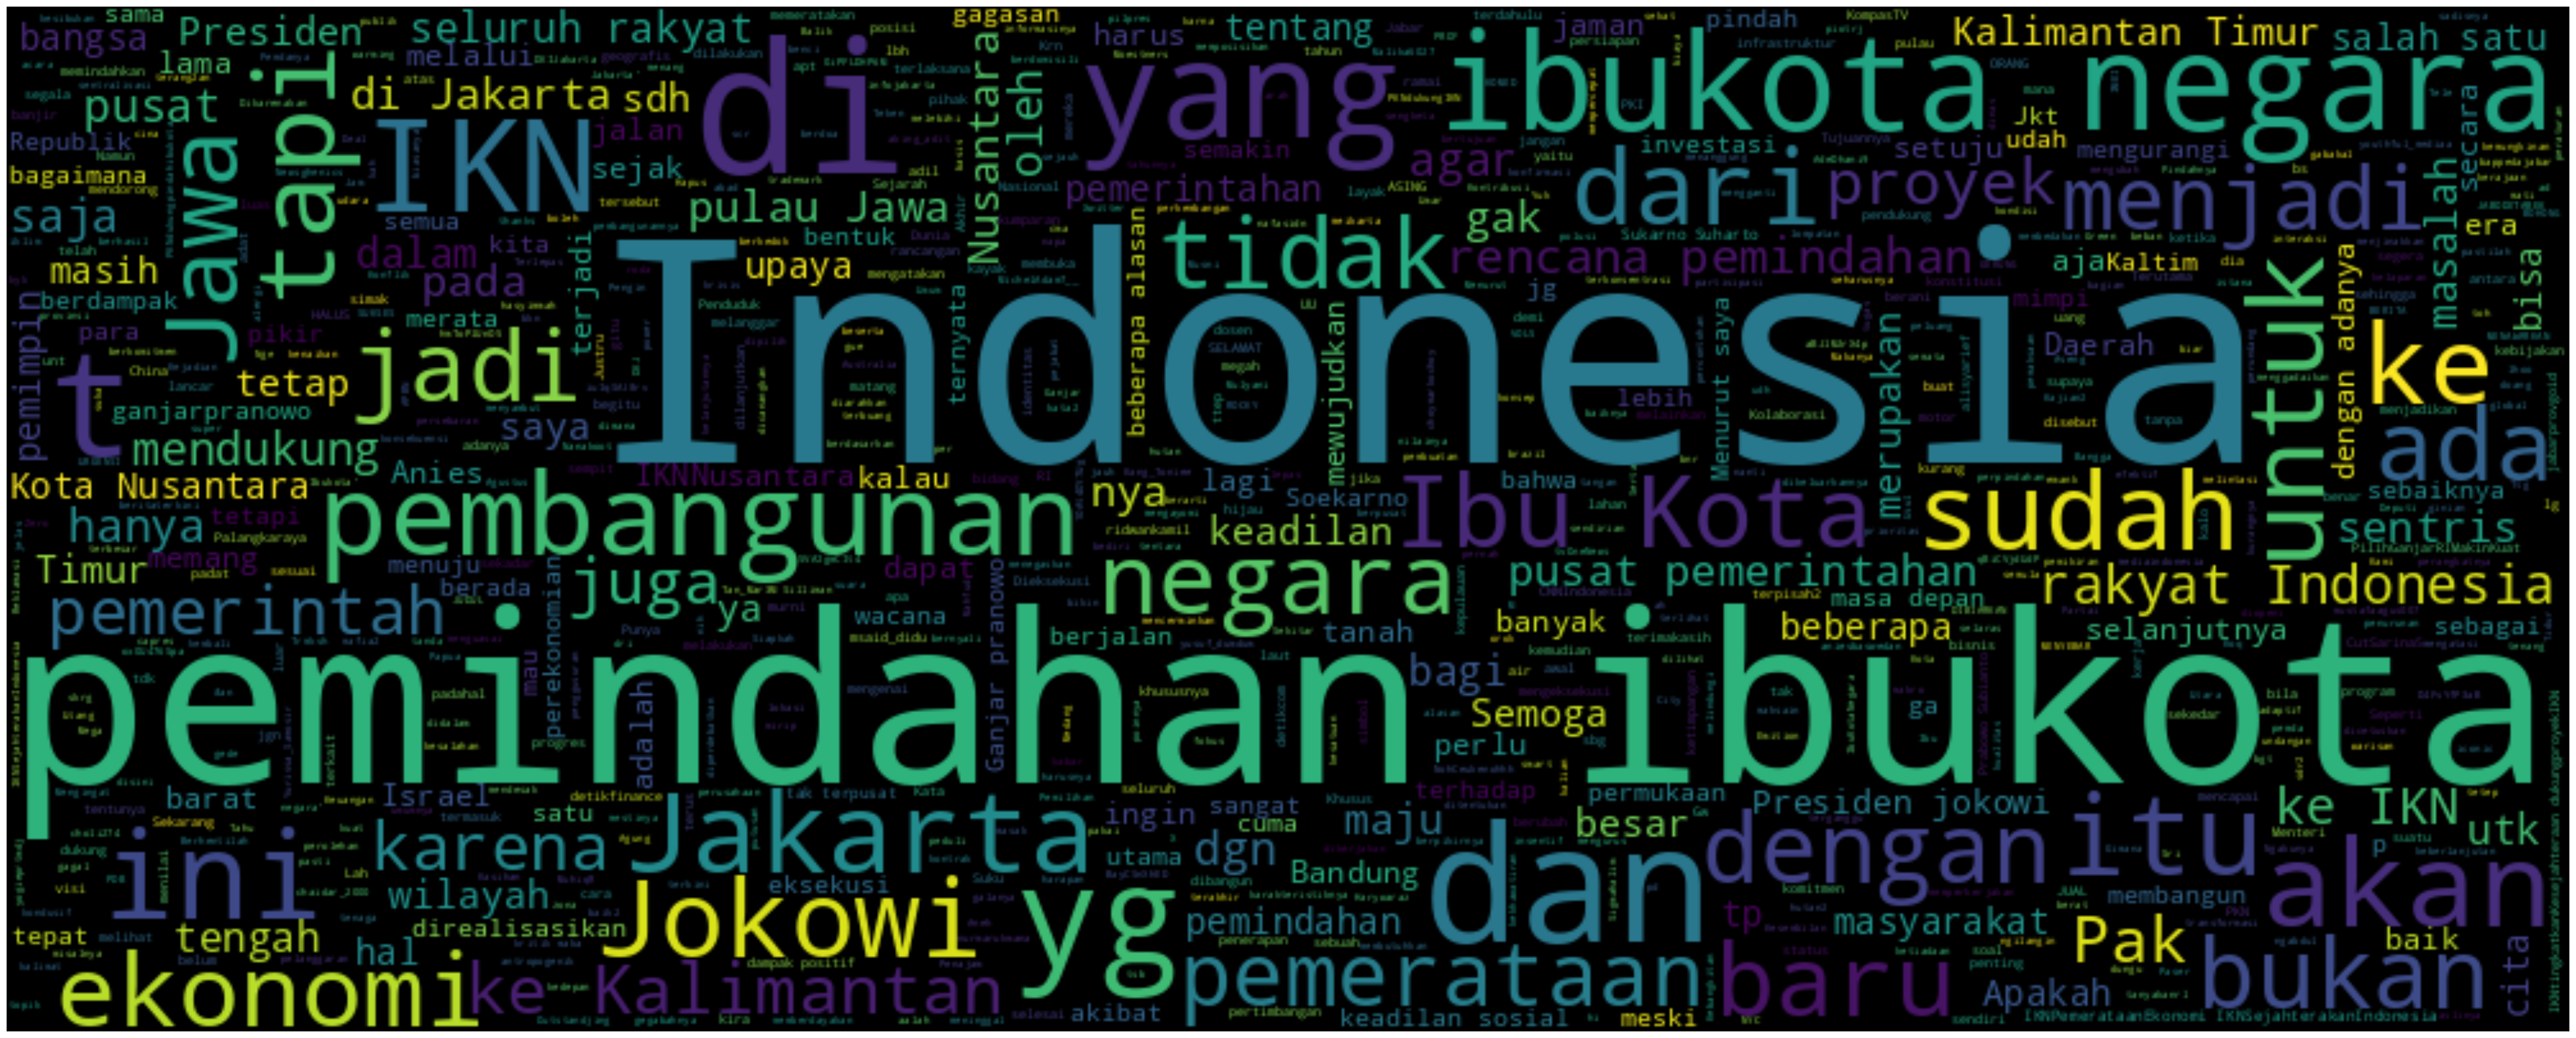

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df = " ".join(data['full_text'].tolist())

# Add custom stopwords
stopwords = set (STOPWORDS)
stopwords.update(['https', 'co', 'RT', 'amp', '...'])

# Create WordCloud
wc = WordCloud(stopwords=stopwords, background_color='black', max_words=1000, width=1000, height=400)
wc.generate(df)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(50, 100))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


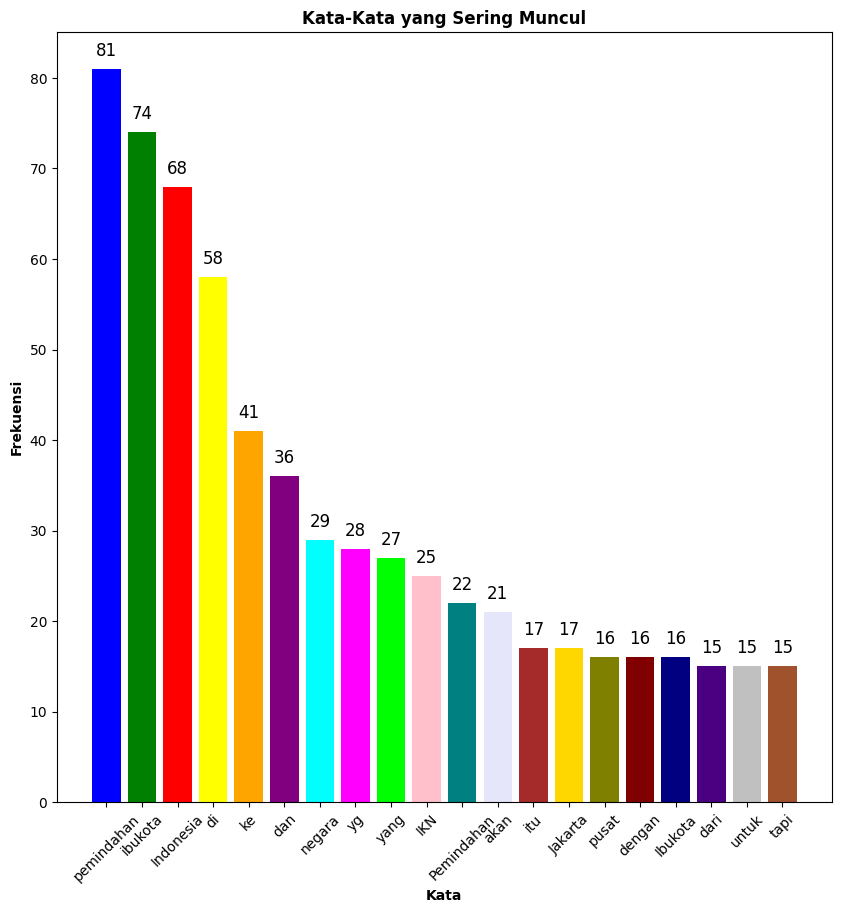

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text =" ".join(data["full_text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(20)
word, count = zip(*top_words)

colors = plt.cm.Paired(range(len(word)))
colors = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'cyan',
          'magenta', 'lime', 'pink', 'teal', 'lavender', 'brown', 'gold',
          'olive', 'maroon', 'navy', 'indigo', 'silver', 'sienna']


plt.figure(figsize=(10, 10))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata", fontweight='bold')
plt.ylabel("Frekuensi", fontweight='bold')
plt.title("Kata-Kata yang Sering Muncul", fontweight='bold')
plt.xticks(rotation = 45)

#for bar, num in zip(bars, count):
#    plt.text (bar.get_x() + bar.get_width() / 2 - 0.5, num + 1, str(num), fontsize=12, color='black', ha='left')
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 1, str(num), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

In [ ]:
import pandas as pd
data = pd.read_csv("/content/hasil_prepocessing_data.csv")
data.head()

full_text  \
0  ...tentang wacana pemindahan ibukota Indonesia...   
1  @Yurissa_Samosir @AdeDhani9 @aking_adit @chaid...   
2  @kumparan Pak..... biaya dinas dari indonesia ...   
3  @yogieprtmdj @kumparan Pemindahan ibukota baru...   
4  @tanyakanrl Aneh ah yg maksain jkt tetep ibuko...   

                                            cleasing  \
0  tentang wacana pemindahan ibukota Indonesia yg...   
1  YurissaSamosir AdeDhani akingadit chaidar Kang...   
2  kumparan Pak biaya dinas dari indonesia timur ...   
3  yogieprtmdj kumparan Pemindahan ibukota baru i...   
4  tanyakanrl Aneh ah yg maksain jkt tetep ibukot...   

                       Tokenization and Case Folding  \
0  ['tentang', 'wacana', 'pemindahan', 'ibukota',...   
1  ['yurissasamosir', 'adedhani', 'akingadit', 'c...   
2  ['kumparan', 'pak', 'biaya', 'dinas', 'dari', ...   
3  ['yogieprtmdj', 'kumparan', 'pemindahan', 'ibu...   
4  ['tanyakanrl', 'aneh', 'ah', 'yg', 'maksain', ...   

                          Filtering/stopword removal  \
0  ['wacana', 'pemindahan', 'ibukota', 'indonesia...   
1  ['yurissasamosir', 'adedhani', 'akingadit', 'c...   
2  ['kumparan', 'biaya', 'dinas', 'indonesia', 't...   
3  ['yogieprtmdj', 'kumparan', 'pemindahan', 'ibu...   
4  ['tanyakanrl', 'aneh', 'ah', 'yg', 'maksain', ...   

                                       stemming_data  
0  wacana pindah ibukota indonesia yg realisasi j...  
1  yurissasamosir adedhani akingadit chaidar kang...  
2  kumpar biaya dinas indonesia timur tanda tanga...  
3  yogieprtmdj kumpar pindah ibukota dampak indon...  
4  tanyakanrl aneh ah yg maksain jkt tetep ibukot...

In [ ]:
import pandas as pd

# Ganti path dengan path yang sesuai di Google Colab
df = pd.read_csv('/content/hasil_prepocessing_data.csv')

# Daftar kata-kata positif, negatif, dan netral yang ingin ditambahkan
kata_kata_positif_tambahan = ['bagus', 'mendukung', 'puas', 'setuju']
kata_kata_negatif_tambahan = ['tidak', 'menyedihkan', 'kecewa']
kata_kata_netral_tambahan = ['biasa', 'netral', 'normal']

# Buat fungsi untuk memberikan label berdasarkan kriteria tertentu
def label_sentiment(text):
    # Lakukan pengecekan pola teks untuk menentukan label
    # Di sini hanya contoh sederhana, Anda dapat menggunakan analisis sentimen yang lebih canggih
    kata_negatif = ['negatif', 'menolak'] + kata_kata_negatif_tambahan
    kata_positif = ['positif', 'setuju'] + kata_kata_positif_tambahan
    kata_netral = kata_kata_netral_tambahan  # Gabungkan dengan kata-kata netral yang ada

    if any(kata in text.lower() for kata in kata_positif):
        return 'pro'
    elif any(kata in text.lower() for kata in kata_negatif):
        return 'kontra'
    elif any(kata in text.lower() for kata in kata_netral):
        return 'netral'
    else:
        return 'lainnya'  # Misal, jika tidak ada kategori yang sesuai

# Berikan label pada DataFrame dengan menggunakan fungsi yang telah dibuat
df['sentimen'] = df['full_text'].apply(label_sentiment)

# Tampilkan lima baris pertama dengan label
print(df.head())


                                           full_text  \
0  ...tentang wacana pemindahan ibukota Indonesia...   
1  @Yurissa_Samosir @AdeDhani9 @aking_adit @chaid...   
2  @kumparan Pak..... biaya dinas dari indonesia ...   
3  @yogieprtmdj @kumparan Pemindahan ibukota baru...   
4  @tanyakanrl Aneh ah yg maksain jkt tetep ibuko...   

                                            cleasing  \
0  tentang wacana pemindahan ibukota Indonesia yg...   
1  YurissaSamosir AdeDhani akingadit chaidar Kang...   
2  kumparan Pak biaya dinas dari indonesia timur ...   
3  yogieprtmdj kumparan Pemindahan ibukota baru i...   
4  tanyakanrl Aneh ah yg maksain jkt tetep ibukot...   

                       Tokenization and Case Folding  \
0  ['tentang', 'wacana', 'pemindahan', 'ibukota',...   
1  ['yurissasamosir', 'adedhani', 'akingadit', 'c...   
2  ['kumparan', 'pak', 'biaya', 'dinas', 'dari', ...   
3  ['yogieprtmdj', 'kumparan', 'pemindahan', 'ibu...   
4  ['tanyakanrl', 'aneh', 'ah', 'yg', 'maksain

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk menghapus stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text])

# Misalkan df adalah DataFrame Anda
df['stemming_data'] = df['Filtering/stopword removal'].apply(lambda x: stem_text(x))
df.head(105)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


full_text  \
0   ...tentang wacana pemindahan ibukota Indonesia...   
1   @Yurissa_Samosir @AdeDhani9 @aking_adit @chaid...   
2   @kumparan Pak..... biaya dinas dari indonesia ...   
3   @yogieprtmdj @kumparan Pemindahan ibukota baru...   
4   @tanyakanrl Aneh ah yg maksain jkt tetep ibuko...   
..                                                ...   
94  Yup, bisa disebut pemindahan ibukota ini sebag...   
95  Indonesia Mendorong Pemerataan Pembangunan Mel...   
96  Peresmian Tahun 2024 Jakarta Bukan Lagi Ibu Ko...   
97  Pemindahan Ibukota Bisa Wujudkan Pemerataan da...   
98  Pembeli apt disuruh bayar bertahun2 tp apt-nya...   

                                             cleasing  \
0   tentang wacana pemindahan ibukota Indonesia yg...   
1   YurissaSamosir AdeDhani akingadit chaidar Kang...   
2   kumparan Pak biaya dinas dari indonesia timur ...   
3   yogieprtmdj kumparan Pemindahan ibukota baru i...   
4   tanyakanrl Aneh ah yg maksain jkt tetep ibukot...   
..                                                ...   
94  Yup bisa disebut pemindahan ibukota ini sebaga...   
95  Indonesia Mendorong Pemerataan Pembangunan Mel...   
96  Peresmian Tahun  Jakarta Bukan Lagi Ibu Kota N...   
97  Pemindahan Ibukota Bisa Wujudkan Pemerataan da...   
98  Pembeli apt disuruh bayar bertahun tp aptnya g...   

                        Tokenization and Case Folding  \
0   ['tentang', 'wacana', 'pemindahan', 'ibukota',...   
1   ['yurissasamosir', 'adedhani', 'akingadit', 'c...   
2   ['kumparan', 'pak', 'biaya', 'dinas', 'dari', ...   
3   ['yogieprtmdj', 'kumparan', 'pemindahan', 'ibu...   
4   ['tanyakanrl', 'aneh', 'ah', 'yg', 'maksain', ...   
..                                                ...   
94  ['yup', 'bisa', 'disebut', 'pemindahan', 'ibuk...   
95  ['indonesia', 'mendorong', 'pemerataan', 'pemb...   
96  ['peresmian', 'tahun', 'jakarta', 'bukan', 'la...   
97  ['pemindahan', 'ibukota', 'bisa', 'wujudkan', ...   
98  ['pembeli', 'apt', 'disuruh', 'bayar', 'bertah...   

                           Filtering/stopword removal  \
0   ['wacana', 'pemindahan', 'ibukota', 'indonesia...   
1   ['yurissasamosir', 'adedhani', 'akingadit', 'c...   
2   ['kumparan', 'biaya', 'dinas', 'indonesia', 't...   
3   ['yogieprtmdj', 'kumparan', 'pemindahan', 'ibu...   
4   ['tanyakanrl', 'aneh', 'ah', 'yg', 'maksain', ...   
..                                                ...   
94  ['yup', 'pemindahan', 'ibukota', 'bentuk', 'pe...   
95  ['indonesia', 'mendorong', 'pemerataan', 'pemb...   
96  ['peresmian', 'jakarta', 'kota', 'negara', 'in...   
97  ['pemindahan', 'ibukota', 'wujudkan', 'pemerat...   
98  ['pembeli', 'apt', 'disuruh', 'bayar', 'bertah...   

                                        stemming_data sentimen  
0     w a c a n a     p e m i n d a h a n     i b ...      pro  
1     y u r i s s a s a m o s i r     a d e d h a ...  lainnya  
2     k u m p a r a n     b i a y a     d i n a s ...  lainnya  
3     y o g i e p r t m d j     k u m p a r a n   ...   kontra  
4     t a n y a k a n r l     a n e h     a h     ...  lainnya  
..                                                ...      ...  
94    y u p     p e m i n d a h a n     i b u k o ...  lainnya  
95    i n d o n e s i a     m e n d o r o n g     ...  lainnya  
96    p e r e s m i a n     j a k a r t a     k o ...  lainnya  
97    p e m i n d a h a n     i b u k o t a     w ...  lainnya  
98    p e m b e l i     a p t     d i s u r u h   ...  lainnya  

[99 rows x 6 columns]

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('sentimen').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

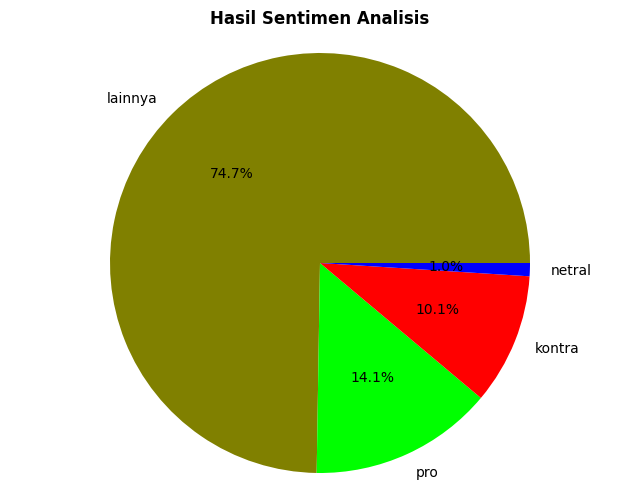

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ganti path dengan path yang sesuai di Google Colab
df = pd.read_csv('/content/hasil_prepocessing_data.csv')

# Fungsi label_sentiment dan definisi kata-kata tambahan

# Definisi fungsi label_sentiment
# ... (gunakan fungsi label_sentiment yang sudah Anda buat sebelumnya)

# Definisi kata-kata tambahan
kata_kata_positif_tambahan = ['bagus', 'mendukung', 'puas', 'setuju']
kata_kata_negatif_tambahan = ['tidak', 'menyedihkan', 'kecewa']
kata_kata_netral_tambahan = ['biasa', 'netral', 'normal']

# Berikan label pada DataFrame dengan menggunakan fungsi yang telah dibuat
df['sentimen'] = df['full_text'].apply(label_sentiment)

# Membuat diagram pie dari kolom 'sentimen'
sentimen_counts = df['sentimen'].value_counts()
labels = sentimen_counts.index.tolist()
sizes = sentimen_counts.values.tolist()

# Tentukan warna untuk setiap kategori
colors = {'pro': 'lime', 'kontra': 'red', 'netral': 'blue', 'lainnya': 'olive'}

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=[colors[label] for label in labels])
plt.title('Hasil Sentimen Analisis',fontweight = 'bold')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()


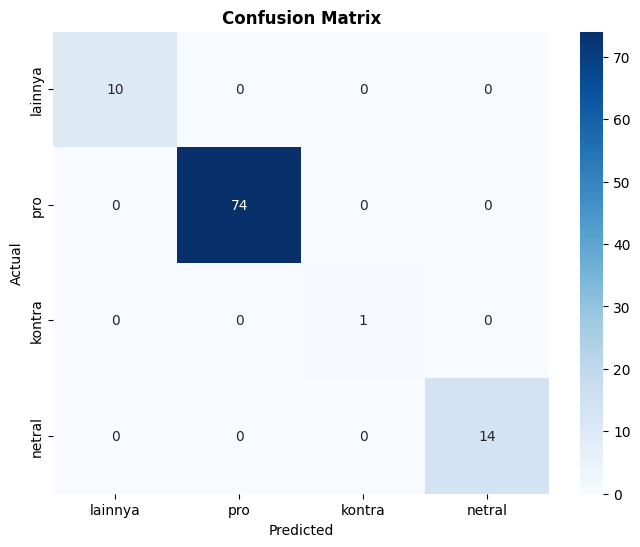

              precision    recall  f1-score   support

      kontra       1.00      1.00      1.00        10
     lainnya       1.00      1.00      1.00        74
      netral       1.00      1.00      1.00         1
         pro       1.00      1.00      1.00        14

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Ganti path dengan path yang sesuai di Google Colab
df = pd.read_csv('/content/hasil_prepocessing_data.csv')

# Fungsi label_sentiment dan definisi kata-kata tambahan

# Definisi fungsi label_sentiment
# ... (gunakan fungsi label_sentiment yang sudah Anda buat sebelumnya)

# Definisi kata-kata tambahan
kata_kata_positif_tambahan = ['bagus', 'mendukung', 'puas', 'setuju']
kata_kata_negatif_tambahan = ['tidak', 'menyedihkan', 'kecewa']
kata_kata_netral_tambahan = ['biasa', 'netral', 'normal']

# Berikan label pada DataFrame dengan menggunakan fungsi yang telah dibuat
df['sentimen'] = df['full_text'].apply(label_sentiment)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(df['sentimen'], df['sentimen'])

# Menampilkan confusion matrix dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan classification report
print(classification_report(df['sentimen'], df['sentimen']))


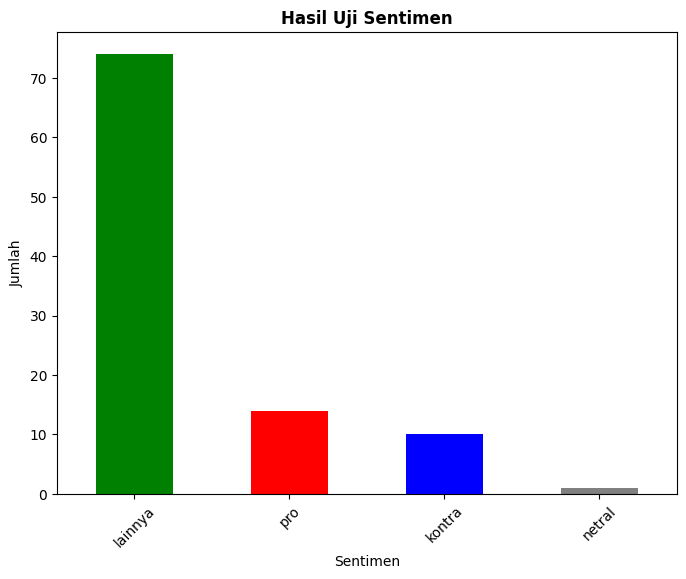

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ganti path dengan path yang sesuai di Google Colab
df = pd.read_csv('/content/hasil_prepocessing_data.csv')

# Fungsi label_sentiment dan definisi kata-kata tambahan

# Definisi fungsi label_sentiment
# ... (gunakan fungsi label_sentiment yang sudah Anda buat sebelumnya)

# Definisi kata-kata tambahan
kata_kata_positif_tambahan = ['bagus', 'mendukung', 'puas', 'setuju']
kata_kata_negatif_tambahan = ['tidak', 'menyedihkan', 'kecewa']
kata_kata_netral_tambahan = ['biasa', 'netral', 'normal']

# Berikan label pada DataFrame dengan menggunakan fungsi yang telah dibuat
df['sentimen'] = df['full_text'].apply(label_sentiment)

# Hitung jumlah sentimen
sentimen_counts = df['sentimen'].value_counts()

# Plot bar chart untuk distribusi sentimen
plt.figure(figsize=(8, 6))
sentimen_counts.plot(kind='bar', color=['green', 'red', 'blue', 'gray'])
plt.title('Hasil Uji Sentimen', fontweight = 'bold')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()
